## How does the dataset look like?

In [1]:
import pandas as pd
df= pd.read_csv("netflix.csv")
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


## What are the columns in this dataset?

In [2]:
df.columns.tolist()

['index',
 'id',
 'title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'imdb_id',
 'imdb_score',
 'imdb_votes']

## How many rows and columns are there?

In [3]:
df.shape

(5283, 11)

In [4]:
df.size

58113

## What are the data types of each column?

In [5]:
df.dtypes

index                  int64
id                    object
title                 object
type                  object
description           object
release_year           int64
age_certification     object
runtime                int64
imdb_id               object
imdb_score           float64
imdb_votes           float64
dtype: object

## Is there any missing data?

In [6]:
df.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

## Are there any duplicate records (movies/series)?

In [7]:
print(df.duplicated().sum())

0


## What are the unique types (Movie/TV Show) available?

In [8]:
print(df['type'].unique())

['MOVIE' 'SHOW']


## What are the unique age certifications?

In [9]:
print(df['age_certification'].unique())

['R' 'PG' 'TV-14' 'G' 'PG-13' nan 'TV-MA' 'TV-PG' 'TV-Y' 'TV-G' 'TV-Y7'
 'NC-17']


## Which year has the most content released?

In [10]:
df['release_year'].value_counts().head(1)

release_year
2019    749
Name: count, dtype: int64

## What is the average runtime of content?

In [11]:
print(df['runtime'].mean())

79.19988642816581


## What is the average IMDB score?

In [12]:
df['imdb_score'].mean()

np.float64(6.5334469051675175)

## Which content has the highest IMDB score?

In [13]:
df.loc[df['imdb_score'].idxmax()]

index                                                              622
id                                                            ts160526
title                                                         Khawatir
type                                                              SHOW
description          A TV show devoted to help young people to be m...
release_year                                                      2005
age_certification                                                TV-14
runtime                                                             20
imdb_id                                                      tt3062514
imdb_score                                                         9.6
imdb_votes                                                      3046.0
Name: 622, dtype: object

## What are the top 10 most rated (by IMDB score) movies?

In [16]:
df[df['type']=='MOVIE'].nlargest(10, 'imdb_score')[['title', 'imdb_score']]

,title,imdb_score
24,No Longer Kids,9.0
822,Chhota Bheem & Krishna in Mayanagari,9.0
2685,C/o Kancharapalem,9.0
3172,David Attenborough: A Life on Our Planet,9.0
101,Forrest Gump,8.8
246,Inception,8.8
4143,Sky Tour: The Movie,8.8
81,Bye Bye London,8.7
495,A Lion in the House,8.7
566,Anbe Sivam,8.7


## How many contents are released each year (trend over time)?

<Axes: xlabel='release_year'>

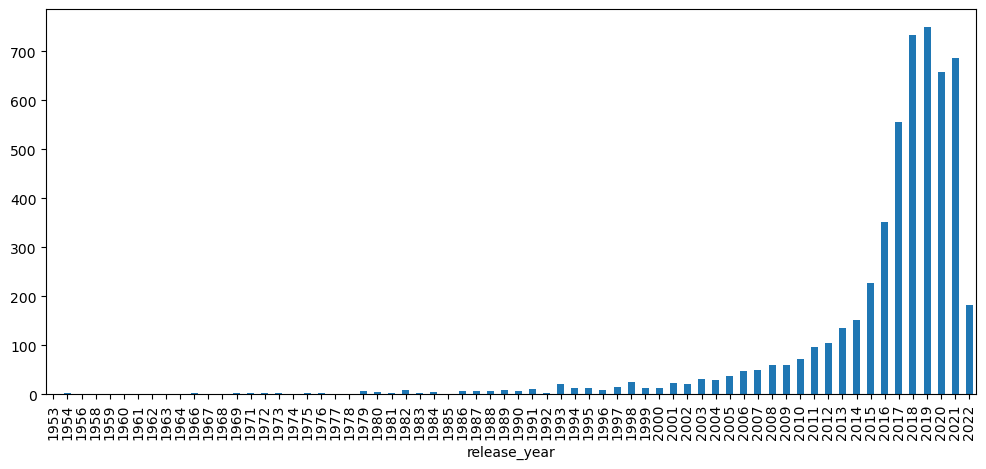

In [23]:
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))

## What’s the distribution of runtime?

<Axes: xlabel='runtime', ylabel='Count'>

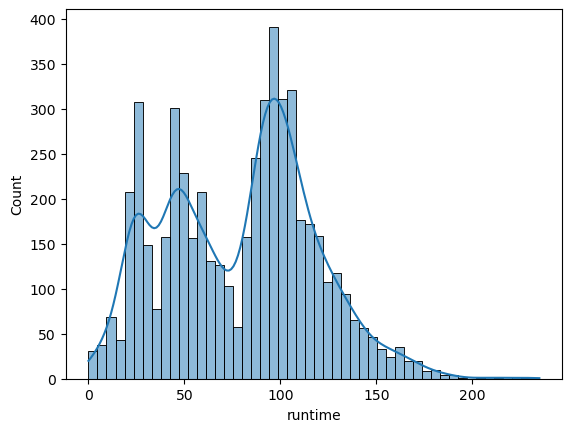

In [29]:
import seaborn as sns
sns.histplot(df['runtime'], bins=50, kde=True)

## Which certification has the highest average IMDB score?

In [33]:
df.groupby('age_certification')['imdb_score'].mean().sort_values(ascending=False).head(1)

age_certification
TV-14    7.262615
Name: imdb_score, dtype: float64

## What’s the proportion of Movies vs TV Shows?

In [38]:
df['type'].value_counts(normalize=True) * 100

type
MOVIE    64.489873
SHOW     35.510127
Name: proportion, dtype: float64